In [134]:
# TODO - Necessary imports
import os
import csv
import math
import pandas as pd
import operator
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import sys
import seaborn as sb

In [11]:
# Data imports
print('INFO: Starting data scan')
test_data_tables = ['question-4-test-features.csv', 'question-4-test-labels.csv']
train_data_tables = ['question-4-train-features.csv', 'question-4-train-labels.csv']
train_features = pd.read_csv(train_data_tables[0], header=None).to_numpy()
print('INFO: Training data features scanned')
train_labels = pd.read_csv(train_data_tables[1], header=None).to_numpy()
print('INFO: Training data labels scanned')
test_features = pd.read_csv(test_data_tables[0], header=None).to_numpy()
print('INFO: Test data features scanned')
test_labels = pd.read_csv(test_data_tables[1], header=None).to_numpy()
print('INFO: Test data labels scanned')
vocabulary = pd.read_csv('question-4-vocab.txt', sep = '\n', header = None)
print('INFO: Vocabulary scanned')
print('Data scan completed')

INFO: Training data features scanned
INFO: Training data labels scanned
INFO: Test data features scanned
INFO: Test data labels scanned
Data scan completed


In [35]:
# Dividing documents into 4 subclasses
medicine_class = []
space_class = []
cryp_class = []
elec_class = []
def classify_documents(data_features, data_labels):
    for idx in range(data_labels.size):
        data = np.asarray(data_features[idx])
        if data_labels[idx][0] == 0:
            medicine_class.append(data)
        elif data_labels[idx][0] == 1:
            space_class.append(data)
        elif data_labels[idx][0] == 2:
            cryp_class.append(data)
        elif data_labels[idx][0] == 3:
            elec_class.append(data)
classify_documents(train_features, train_labels)
medicine_train = np.asarray(medicine_class)
space_train = np.asarray(space_class)
cryp_train = np.asarray(cryp_class)
elec_train = np.asarray(elec_class)

(800, 37358)
(800, 37358)
(800, 37358)
(800, 37358)


In [121]:
# Form series including the cumulative word count in a document (Documents) x (No of occurances of each word)
def compute_word_count(train_set):
    word_count = np.zeros(train_set.shape[1])
    for idx in range(train_set.shape[0]):
        word_count = np.add(word_count, train_set[idx])
    return word_count
def compute_total_word_counts(medicine_set, space_set, cryp_set, elec_set):
    word_counts = []
    word_counts.append(compute_word_count(medicine_set))
    word_counts.append(compute_word_count(space_set))
    word_counts.append(compute_word_count(cryp_set))
    word_counts.append(compute_word_count(elec_set))
    return np.array(word_counts)
total_word_counts = compute_total_word_counts(medicine_train, space_train, cryp_train, elec_train)
total_word_counts

array([[ 0.,  0.,  0., ..., 14.,  0.,  0.],
       [ 0.,  0.,  0., ...,  4.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  1.,  0.],
       [ 0.,  2.,  0., ...,  1.,  0.,  0.]])

In [123]:
# TODO - Form matrix including learned parameters
def form_parameter_matrix(sets, a):
    dist_word_count = sets[0].size
    param_matrix = np.zeros([4, dist_word_count])
    sums = np.zeros(4)
    for i in range(4):
        word_count = np.sum(sets[i])
        for word in range(sets[i].size):
            param_matrix[i][word] = (sets[i][word] + a) / (word_count + sets[i].size * a)
    return param_matrix
MLE_params = form_parameter_matrix(total_word_counts, 0)
print(MLE_params)
print('Parameters calculated')

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.40411405e-04
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.80843569e-05
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 8.93663035e-05
  8.93663035e-06 0.00000000e+00]
 [0.00000000e+00 3.27091340e-05 0.00000000e+00 ... 1.63545670e-05
  0.00000000e+00 0.00000000e+00]]
Parameters calculated


In [124]:
p_medicine = math.log(medicine_train.shape[0] / train_features.shape[0])
p_space = math.log(space_train.shape[0] / train_features.shape[0])
p_cryp = math.log(cryp_train.shape[0] / train_features.shape[0])
p_elec = math.log(elec_train.shape[0] / train_features.shape[0])
print('Document type parameters used for estimation: ' + str(p_medicine) + ',' + str(p_space) + ',' + str(p_cryp) + ',' + str(p_elec))
# TODO - MLE Predictor for a document
def predict_document(data_to_predict, variables):
    type_0 = p_medicine # Assuming it has type medicine
    type_1 = p_space # Assuming it has type space
    type_2 = p_cryp # Assuming it has type cryptology
    type_3 = p_elec # Assuming it has type space
    flags = [0,0,0,0]
    for i in range(data_to_predict.size):
        if flags[0] == 0:
            if (data_to_predict[i] == 0 and variables[0][i] == 0):
                type_0 += 0
            elif variables[0][i] == 0:
                flags[0] = 1
                type_0 = -1 * math.inf # smallest number in python as (-infinity)
            else:
                type_0 += (data_to_predict[i]) * math.log(variables[0][i])
        if flags[1] == 0:
            if (data_to_predict[i] == 0 and variables[1][i] == 0):
                type_1 += 0
            elif variables[1][i] == 0:
                flags[1] = 1
                type_1 = -1 * math.inf # smallest number in python as (-infinity)
            else:
                type_1 += (data_to_predict[i]) * math.log(variables[1][i]) 
        if flags[2] == 0:
            if (data_to_predict[i] == 0 and variables[2][i] == 0):
                type_2 += 0
            elif variables[2][i] == 0:
                flags[2] = 1
                type_2 = -1 * math.inf # smallest number in python as (-infinity)
            else:
                type_2 += (data_to_predict[i]) * math.log(variables[2][i])
        if flags[3] == 0:
            if (data_to_predict[i] == 0 and variables[3][i] == 0):
                type_3 += 0
            elif variables[3][i] == 0:
                flags[3] = 1
                type_3 = -1 * math.inf
            else:
                type_3 += (data_to_predict[i]) * math.log(variables[3][i])
    results = [] # Will store the results as tuples (maxiimized_parameter, document code)
    results.append((type_0, 0))
    results.append((type_1, 1))
    results.append((type_2, 2))
    results.append((type_3, 3))
    results.sort(key=operator.itemgetter(0), reverse=True)
    max_value = results[0][0]
    if results[1][0] == max_value:
        return 1
    return results[0][1]

Document type parameters used for estimation: -1.3862943611198906,-1.3862943611198906,-1.3862943611198906,-1.3862943611198906


In [234]:
# MLE analysis method
def analysis(features, labels, params):
    # Results are organized in terms of tuples - A tuple for medicine documents will be (false_medicine, true_medicine, total_medicine)
    totals = [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]] # Indexes are same with document number
    true_pred = 0
    total_pred = 0
    for i in range(labels.size):
        guess = predict_document(features[i], params)
        if guess == labels[i][0]:
            true_pred += 1
            total_pred += 1
            totals[guess][2] += 1
            totals[guess][1] += 1
        else:
            total_pred += 1
            totals[guess][2] += 1
            totals[guess][0] += 1
    return [totals, (true_pred / total_pred)]

In [125]:
# Getting MLE results
MLE_data = analysis(test_features, test_labels, MLE_params)
MLE_data

Data 29 predicted
Data 59 predicted
Data 89 predicted
Data 119 predicted
Data 149 predicted
Data 179 predicted
Data 209 predicted
Data 239 predicted
Data 269 predicted
Data 299 predicted
Data 329 predicted
Data 359 predicted
Data 389 predicted
Data 419 predicted
Data 449 predicted
Data 479 predicted
Data 509 predicted
Data 539 predicted
Data 569 predicted
Data 599 predicted
Data 629 predicted
Data 659 predicted
Data 689 predicted
Data 719 predicted
Data 749 predicted
Data 779 predicted


[[[0, 7, 7], [575, 200, 775], [1, 9, 10], [0, 8, 8]], 0.28]

In [127]:
# Getting MAP results
MAP_matrix = form_parameter_matrix(total_word_counts, 1)
MAP_matrix

array([[7.29580856e-06, 7.29580856e-06, 7.29580856e-06, ...,
        1.09437128e-04, 7.29580856e-06, 7.29580856e-06],
       [7.02306374e-06, 7.02306374e-06, 7.02306374e-06, ...,
        3.51153187e-05, 7.02306374e-06, 7.02306374e-06],
       [6.69985327e-06, 6.69985327e-06, 6.69985327e-06, ...,
        7.36983860e-05, 1.33997065e-05, 6.69985327e-06],
       [1.01519751e-05, 3.04559252e-05, 1.01519751e-05, ...,
        2.03039501e-05, 1.01519751e-05, 1.01519751e-05]])

In [128]:
# TODO - MAP analysis method
MAP_data = analysis(test_features, test_labels, MAP_matrix)
MAP_data

Data 29 predicted
Data 59 predicted
Data 89 predicted
Data 119 predicted
Data 149 predicted
Data 179 predicted
Data 209 predicted
Data 239 predicted
Data 269 predicted
Data 299 predicted
Data 329 predicted
Data 359 predicted
Data 389 predicted
Data 419 predicted
Data 449 predicted
Data 479 predicted
Data 509 predicted
Data 539 predicted
Data 569 predicted
Data 599 predicted
Data 629 predicted
Data 659 predicted
Data 689 predicted
Data 719 predicted
Data 749 predicted
Data 779 predicted


[[[7, 180, 187], [14, 191, 205], [18, 187, 205], [22, 181, 203]], 0.92375]

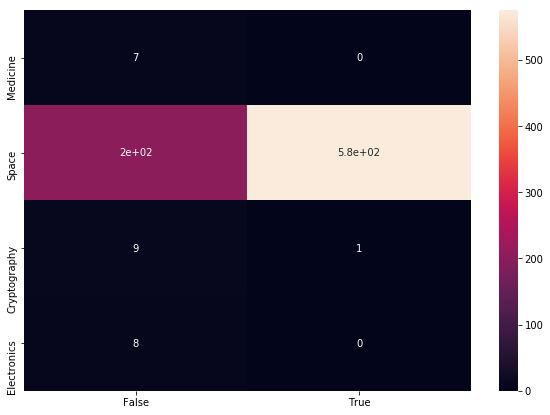

In [139]:
# Plot of the values in confusion matrix for MLE estimator
confusion_matrix_MLE = []
for idx in range(len(MLE_data[0])):
    confusion_matrix_MLE.append([MLE_data[0][idx][0], MLE_data[0][idx][1]]) # False predictions in index 0, true predictions in index 1
confusion_matrix_MLE = pd.DataFrame(confusion_matrix_MLE, columns = ['False', 'True'], index = ['Medicine', 'Space', 'Cryptography', 'Electronics'])
plt.figure(figsize = (10,7))
sb.heatmap(confusion_matrix_MLE, annot = True)
plt.show()

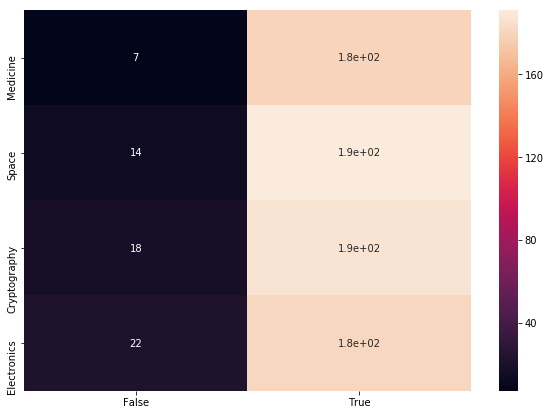

In [140]:
# Confusion Matrix for MAP estimator
confusion_matrix_MAP = []
for idx in range(len(MAP_data[0])):
    confusion_matrix_MAP.append([MAP_data[0][idx][0], MAP_data[0][idx][1]]) # column 1 includes false values, column 2 includes true values
confusion_matrix_MAP = pd.DataFrame(confusion_matrix_MAP, columns = ['False', 'True'], 
                                    index = ['Medicine', 'Space', 'Cryptography', 'Electronics'])
plt.figure(figsize = (10,7))
sb.heatmap(confusion_matrix_MAP, annot = True)
plt.show()

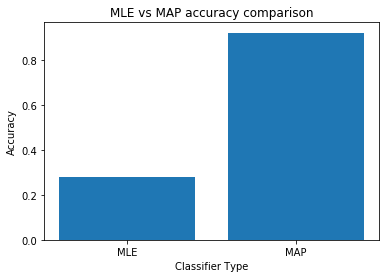

In [141]:
# MAP vs MLE accuracy comparison
plt.bar(['MLE', 'MAP'], [MLE_data[1], MAP_data[1]])
plt.title('MLE vs MAP accuracy comparison')
plt.xlabel('Classifier Type')
plt.ylabel('Accuracy')
plt.show()

In [183]:
# Form words versus occurances and give the max occured 20 words
def get_word_count_mapping(occurrance_matrix):
    words = []
    for doc_class in occurrance_matrix:
        words.append(pd.DataFrame(doc_class, index = vocabulary, columns = ['Word count']))
    return words
def get_most_frequent_20_words():
    d_type = [('word', str), ('count', int)]
    doc_word_count_matrix = get_word_count_mapping(total_word_counts)
    types = ('medicine', 'space', 'cryptography', 'electronics')
    tables = []
    for idx in range(len(doc_word_count_matrix)):
        tables.append(doc_word_count_matrix[idx].sort_values(by=['Word count'], ascending=False)[0:20])
    return tables
most_likely_word_tables = get_most_frequent_20_words()

In [185]:
print('20 words having maximum word count for medicine documents: ')
most_likely_word_tables[0]

20 words having maximum word count for medicine documents: 


,Word count
"(medical,)",428.0
"(people,)",424.0
"(health,)",375.0
"(disease,)",351.0
"(patients,)",314.0
"(time,)",307.0
"(msg,)",293.0
"(food,)",281.0
"(cancer,)",277.0
"(hiv,)",244.0


In [186]:
print(print('20 words having maximum word count for space documents: '))
most_likely_word_tables[1]

20 words having maximum word count for space documents: 
None


,Word count
"(space,)",1447.0
"(nasa,)",795.0
"(launch,)",408.0
"(earth,)",380.0
"(system,)",344.0
"(time,)",337.0
"(posting,)",324.0
"(orbit,)",317.0
"(moon,)",305.0
"(data,)",298.0


In [187]:
print('20 words having maximum word count for cryptography documents: ')
most_likely_word_tables[2]

20 words having maximum word count for cryptography documents: 


,Word count
"(key,)",1334.0
"(encryption,)",873.0
"(chip,)",711.0
"(government,)",696.0
"(clipper,)",649.0
"(people,)",571.0
"(system,)",534.0
"(keys,)",516.0
"(public,)",485.0
"(privacy,)",481.0


In [188]:
print('20 words having maximum word count for electronics documents: ')
most_likely_word_tables[3]

20 words having maximum word count for electronics documents: 


,Word count
"(power,)",266.0
"(ground,)",250.0
"(host,)",227.0
"(work,)",216.0
"(circuit,)",215.0
"(posting,)",213.0
"(time,)",210.0
"(wire,)",200.0
"(current,)",192.0
"(copy,)",174.0


In [180]:
# Word with highest probability and lowest probability
probability_matrix = form_parameter_matrix(total_word_counts, 0)
def get_words_occuring_min_and_max(prob_matrix):
    doc_types = ['Medicine', 'Space', 'Cryptography', 'Electronics']
    results = []
    for idx in range(prob_matrix.shape[0]):
        prob_words = pd.DataFrame(prob_matrix[idx], columns = ['Ocurrance Probability'], index = vocabulary)
        prob_words = prob_words.sort_values(by=['Ocurrance Probability'], ascending=False)
        results.append((prob_words.index.values[0][0], prob_words.index.values[prob_matrix.shape[1] - 1][0]))
    return pd.DataFrame(results, index = doc_types, columns = ['With Max Prob', 'With Min Prob'])
get_words_occuring_min_and_max(probability_matrix)

,With Max Prob,With Min Prob
Medicine,medical,throes
Space,space,throes
Cryptography,key,throes
Electronics,power,throes


In [232]:
probability_matrix = form_parameter_matrix(total_word_counts, 1)
def get_emails_with_highest_lowest_prob(prob_matrix, mail_set, mail_prob_set):
    doc_types = ['Medicine', 'Space', 'Cryptography', 'Electronics']
    results = []
    for idx in range(prob_matrix.shape[0]):
        prob_list = []
        for i in range(mail_set.shape[0]):
            email_prob_const = np.sum(np.multiply(np.log(prob_matrix[idx]), mail_set[i])) + mail_prob_set[idx]
            prob_list.append((email_prob_const, i, idx))
            prob_list = sorted(prob_list, key = operator.itemgetter(0))
        results.append(prob_list)
    return results
def get_max_min_mail_indices(result_matrix):
    min_max = []
    for idx in range(len(result_matrix)):
        min_max.append((result_matrix[idx][0][1], result_matrix[idx][len(result_matrix[idx]) - 1][1]))
    return min_max
mail_probs = [p_medicine, p_space, p_cryp, p_elec]
result = get_emails_with_highest_lowest_prob(probability_matrix, test_features, mail_probs)
get_max_min_mail_indices(result)

[(622, 776), (622, 776), (622, 776), (622, 776)]

In [ ]:
def main():
    total_words = compute_total_word_counts(medicine_train, space_train, cryp_train, elec_train)
    MLE_parameters = form_parameter_matrix(total_words, 0)
    print(MLE_parameters) # Gives the test results of MLE estimator
    print(analysis(test_features, test_labels, MLE_parameters)) # You may see the MLE test results this way
    MAP_parameters = form_parameter_matrix(total_words, 1)
    print(analysis(test_features, test_labels, MAP_parameters)) # You may see the MAP test results this way
    # The graphing part is not included in the main method as it works in the cell manner
main()

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.40411405e-04
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.80843569e-05
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 8.93663035e-05
  8.93663035e-06 0.00000000e+00]
 [0.00000000e+00 3.27091340e-05 0.00000000e+00 ... 1.63545670e-05
  0.00000000e+00 0.00000000e+00]]
[[[0, 7, 7], [575, 200, 775], [1, 9, 10], [0, 8, 8]], 0.28]
